<a href="https://colab.research.google.com/github/pranabdas457/Deep-Learniing/blob/master/Tomato_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Added Kaggle API to pull the dataset from Kaggle </h1>

In [1]:
#install kaggle

In [2]:
!pip install kaggle

In [3]:
#upload the token file in g drive

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pranabdas457","key":"15a368cd06bdba8e60674144d8b2ccc6"}'}

In [4]:
#CREATE A KAGGLE FOLDER

! mkdir ~/.kaggle

In [5]:
#copt the json file to the created folder
!cp kaggle.json ~/.kaggle

In [6]:
#chamge the permission
!chmod 600  ~/.kaggle/kaggle.json

In [7]:
#see the list of datasets
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          19002  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11603  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5980  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           4037  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

<h1> PLANT DISEASE DATASET USING DEEP LEARNING </h1>

In [8]:
#Download  the dataset
!kaggle datasets download -d noulam/tomato

 97% 720M/743M [00:06<00:00, 92.5MB/s]
100% 743M/743M [00:06<00:00, 112MB/s] 


In [ ]:
!unzip tomato.zip

In [10]:
#to check the GPU allocated
!nvidia-smi

Fri Jan 21 16:01:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [14]:
from tensorflow.keras.layers import Input,  Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [16]:
Image_Size = [224, 224]

#defining train and test path
train_path = '/content/New Plant Diseases Dataset(Augmented)/train'
test_path = '/content/New Plant Diseases Dataset(Augmented)/valid'


In [18]:
#here we are using Inception V3, We are using transfer learning here
#include_top = False means we don't want to add the first and the last layer
inception_model = InceptionV3(input_shape= Image_Size + [3], weights = 'imagenet', include_top= False)

87924736/87910968 [==============================] - 0s 0us/step


In [19]:
#since we are using the transfer learning technique, we are setting the layers training as false
for layer in inception_model.layers:
  layer.trainable = False

In [20]:
folders = glob('/content/New Plant Diseases Dataset(Augmented)/train/*')

In [24]:
#number of folders/ classes present in train folder
print(folders)
#Total number of classes
print("Total number of classes are {}", format(len(folders)))

['/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight', '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold', '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus', '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot', '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus', '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite', '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot', '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot', '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy', '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight']
Total number of classes are {} 10


In [26]:
#Defining the output layer

x = Flatten()(inception_model.output)

In [27]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [29]:
#creating the model

model = Model(inputs=  inception_model.input, outputs = prediction)

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [46]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy()]
)

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [54]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [56]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [57]:
test_set = test_datagen.flow_from_directory(test_path,
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [60]:
r = model.fit_generator(
    training_set,
    validation_data= test_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
1147/1147 [==============================] - 248s 205ms/step - loss: 4.1615 - accuracy: 0.0956 - val_loss: 2.9014 - val_accuracy: 0.1770
Epoch 2/10
1147/1147 [==============================] - 236s 205ms/step - loss: 3.4180 - accuracy: 0.2952 - val_loss: 2.7466 - val_accuracy: 0.3567
Epoch 3/10
1147/1147 [==============================] - 241s 210ms/step - loss: 3.1894 - accuracy: 0.4553 - val_loss: 2.8485 - val_accuracy: 0.4883
Epoch 4/10
1147/1147 [==============================] - 239s 209ms/step - loss: 3.2553 - accuracy: 0.5567 - val_loss: 4.0373 - val_accuracy: 0.5728
Epoch 5/10
1147/1147 [==============================] - 257s 224ms/step - loss: 3.0461 - accuracy: 0.6200 - val_loss: 3.8784 - val_accuracy: 0.6221
Epoch 6/10
1147/1147 [==============================] - 265s 231ms/step - loss: 2.8660 - accuracy: 0.6644 - val_loss: 3.4553 - val_accuracy: 0.6611
Epoch 7/10
1147/1147 [==============================] - 276s 241ms/step - loss: 3.0531 - accuracy: 0.7046 - val_

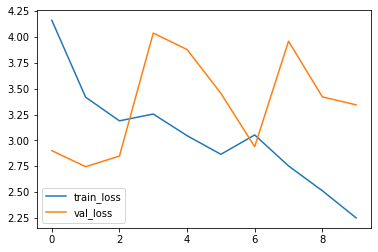

<Figure size 432x288 with 0 Axes>

In [63]:
#plot the loss

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig("LossVall_loss]")